<a href="https://colab.research.google.com/github/tassiogomes/MINDD-ISEP/blob/main/MINDD_PL02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Start to load the dataset week_purchases18-25.txt into R session and next:

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import folium

from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('drive/My Drive/MINDD/week_purchases18-25.txt', sep='\t')
df.head()



Mounted at /content/drive


,Username,TitleCli,Name,Address,Country,Gender,Age,Favourites,Order_ID,Product_ID,Style,Film_Title,Price,PurchTime,PurchDate,Buy_for
0,user_1000884,MRS,DORIS126855,89594388-Boris Road-Doris Town,USA,F,27.0,Adventure,Order_ID_25002281,1048,Comedy,This was Tinny Sap,9.99,23:50:02,25/02/2001,Myself
1,user_1009862,MRS,DORIS42531,75844730-Boris Road-Doris Town,UK,F,36.0,Children,Order_ID_11048478,1060,Children,The Buppets,5.99,23:40:18,22/02/2001,Family
2,user_1025298,MISS,DORIS136770,39704306-Boris Road-Doris Town,UK,F,38.0,Children,Order_ID_62493972,1062,Children,Bogus the Clown,5.99,08:37:27,21/02/2001,Family
3,user_1039001,MR,BORIS111529,46627181-Boris Road-Doris Town,NaN,NaN,NaN,NaN,Order_ID_40324890,1048,Comedy,This was Tinny Sap,9.99,20:17:16,25/02/2001,NaN
4,user_1040891,MRS,DORIS142154,82645107-Boris Road-Doris Town,USA,F,25.0,Adventure,Order_ID_79222013,1013,Comedy,Dr OddBloke or: What bomb? Where?,15.99,21:12:49,22/02/2001,Myself


In [3]:
# a. check its size
print(df.shape)
print("Linhas", df.shape[0])
print("Colunas", df.shape[1])
print(df.columns.to_list())

(739, 16)
Linhas 739
Colunas 16
['Username', 'TitleCli', 'Name', 'Address', 'Country', 'Gender', 'Age', 'Favourites', 'Order_ID', 'Product_ID', 'Style', 'Film_Title', 'Price', 'PurchTime', 'PurchDate', 'Buy_for']


In [4]:
# b. get a summary of data
print(df.describe())

              Age   Product_ID       Price
count  444.000000   739.000000  739.000000
mean    43.182432  1039.170501    8.742368
std     14.657891    17.813339    2.879627
min     21.000000  1001.000000    5.990000
25%     32.000000  1024.000000    5.990000
50%     37.000000  1042.000000    7.990000
75%     58.000000  1056.000000    9.990000
max     75.000000  1062.000000   15.990000


In [5]:
# c. check which columns are numeric and which are categorical
df.dtypes
# convert age float64 to integer
df['Age'] = df['Age'].fillna(0).astype(int) # fillna(0) put 0 in missing values
# purchase time objetc to time
#df['PurchTime'] = pd.to_datetime(df['PurchTime'])
# Converting date objetc to datetime
df['PurchDate'] = pd.to_datetime(df['PurchDate'])
df.dtypes

<ipython-input-5-3ba3b6eab50d>:8: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['PurchDate'] = pd.to_datetime(df['PurchDate'])


Username              object
TitleCli              object
Name                  object
Address               object
Country               object
Gender                object
Age                    int64
Favourites            object
Order_ID              object
Product_ID             int64
Style                 object
Film_Title            object
Price                float64
PurchTime             object
PurchDate     datetime64[ns]
Buy_for               object
dtype: object

In [6]:
# d. check for missing data by rows and by columns
df.isnull().sum(axis = 0)

Username        0
TitleCli        0
Name            0
Address         0
Country       295
Gender        295
Age             0
Favourites    295
Order_ID        0
Product_ID      0
Style           0
Film_Title      0
Price           0
PurchTime       0
PurchDate       0
Buy_for       295
dtype: int64

## 2. Using the appropriate graphs, analyse the various attributes of the data set and make necessary corrections to the data.:

#### a. Title Client

###### check client data, tabs before the title

In [7]:
#Tabs before MRS, Miss and MR
title_counts = df['TitleCli'].value_counts().reset_index()
title_counts.columns = ['Title', 'Count']
print(title_counts)


     Title  Count
0     MR      186
1    MRS      156
2      MR     140
3   MISS       99
4     MRS      92
5    MISS      66


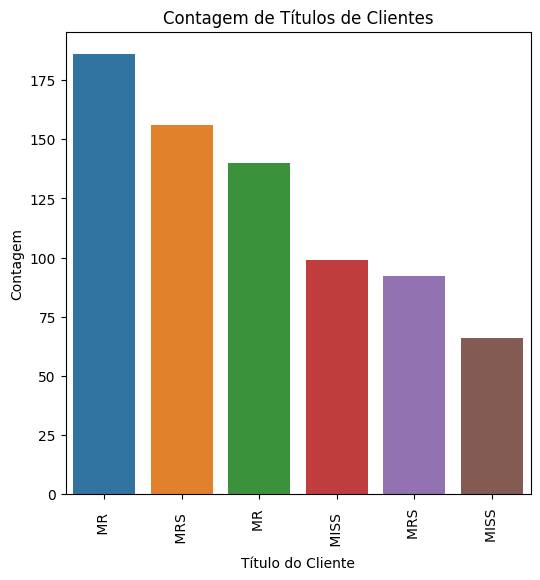

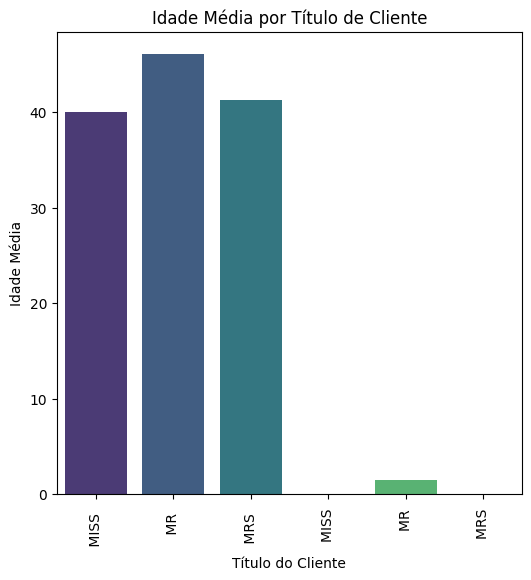

In [8]:
# a. Title Client
import matplotlib.pyplot as plt
import seaborn as sns

title_counts = df['TitleCli'].value_counts()
plt.figure(figsize=(6, 6))
sns.barplot(x=title_counts.index, y=title_counts.values)
plt.xticks(rotation=90)
plt.xlabel('Título do Cliente')
plt.ylabel('Contagem')
plt.title('Contagem de Títulos de Clientes')
plt.show()

# Agrupe os dados por título de cliente e calcule a média da idade
title_age_mean = df.groupby('TitleCli')['Age'].mean().reset_index()

# Crie um gráfico de barras
plt.figure(figsize=(6, 6))
sns.barplot(x='TitleCli', y='Age', data=title_age_mean, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Título do Cliente')
plt.ylabel('Idade Média')
plt.title('Idade Média por Título de Cliente')
plt.show()

###### After remove tabs

In [9]:
# Removing Tabs
title_counts = df['TitleCli'].value_counts().reset_index()
#df['TitleCli'] = df['TitleCli'].str.strip() # remove spaces
df['TitleCli'] = df['TitleCli'].str.replace(r'^\s+|\s+?$', '', regex=True) # remove tabs

print(title_counts)

     index  TitleCli
0     MR         186
1    MRS         156
2      MR        140
3   MISS          99
4     MRS         92
5    MISS         66


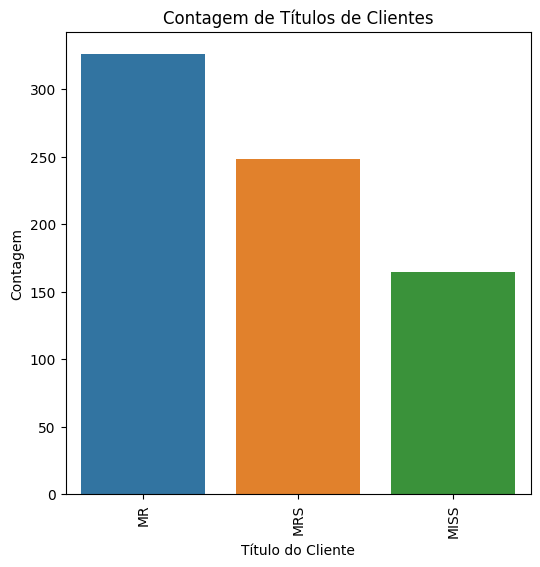

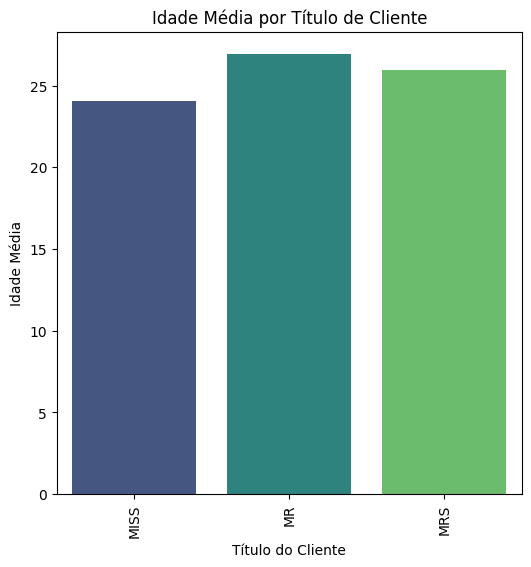

In [10]:
# a. Title Client
import matplotlib.pyplot as plt
import seaborn as sns

title_counts = df['TitleCli'].value_counts()
plt.figure(figsize=(6, 6))
sns.barplot(x=title_counts.index, y=title_counts.values)
plt.xticks(rotation=90)
plt.xlabel('Título do Cliente')
plt.ylabel('Contagem')
plt.title('Contagem de Títulos de Clientes')
plt.show()

# Agrupe os dados por título de cliente e calcule a média da idade
title_age_mean = df.groupby('TitleCli')['Age'].mean().reset_index()

# Crie um gráfico de barras
plt.figure(figsize=(6, 6))
sns.barplot(x='TitleCli', y='Age', data=title_age_mean, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Título do Cliente')
plt.ylabel('Idade Média')
plt.title('Idade Média por Título de Cliente')
plt.show()

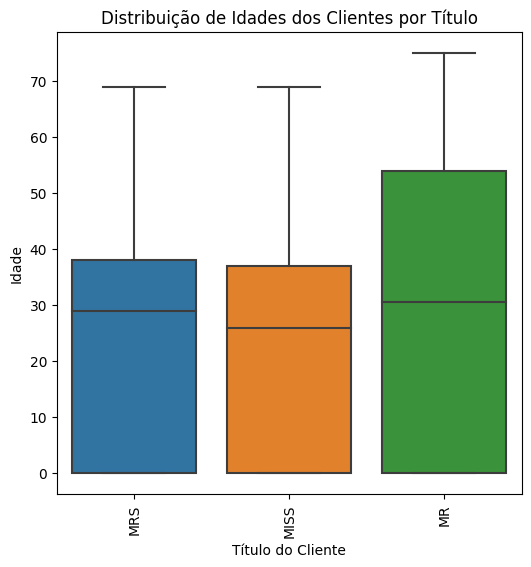

In [11]:
plt.figure(figsize=(6, 6))
sns.boxplot(x='TitleCli', y='Age', data=df)
plt.xticks(rotation=90)
plt.xlabel('Título do Cliente')
plt.ylabel('Idade')
plt.title('Distribuição de Idades dos Clientes por Título')
plt.show()


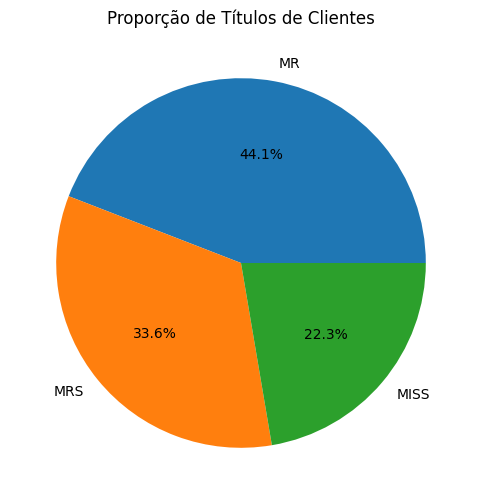

In [12]:
plt.figure(figsize=(6, 6))
title_proportions = df['TitleCli'].value_counts()
plt.pie(title_proportions, labels=title_proportions.index, autopct='%1.1f%%')
plt.title('Proporção de Títulos de Clientes')
plt.show()


#### b. Gender

###### **Before** fill NaN values

In [13]:
gender_counts = df['Gender'].value_counts().reset_index()
gender_counts = df['Gender'].value_counts(dropna=False)
gender_counts2 = df.astype(str)['Gender'].value_counts() # alternative
gender_counts.columns = ['Gender', 'Count']
print(gender_counts)

NaN    295
F      255
M      189
Name: Gender, dtype: int64


###### **After** fill NaN values

In [14]:
df.loc[df['TitleCli'].str.startswith('MR'), 'Gender'] = 'M'
df.loc[df['TitleCli'].str.startswith('MRS') | df['TitleCli'].str.startswith('MISS'), 'Gender'] = 'F'


In [15]:
gender_counts = df['Gender'].value_counts().reset_index()
gender_counts = df['Gender'].value_counts(dropna=False) # count NaN values
gender_counts2 = df.astype(str)['Gender'].value_counts() # alternative
gender_counts.columns = ['Gender', 'Count']
print(gender_counts)

F    413
M    326
Name: Gender, dtype: int64


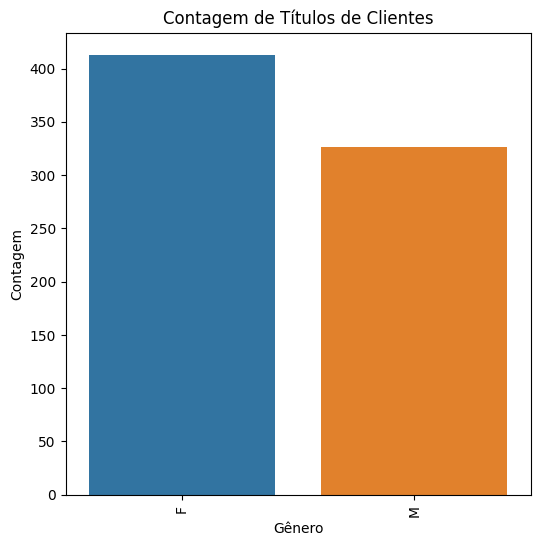

In [16]:
title_counts = df['Gender'].value_counts()
plt.figure(figsize=(6, 6))
sns.barplot(x=title_counts.index, y=title_counts.values)
plt.xticks(rotation=90)
plt.xlabel('Gênero')
plt.ylabel('Contagem')
plt.title('Contagem de Títulos de Clientes')
plt.show()

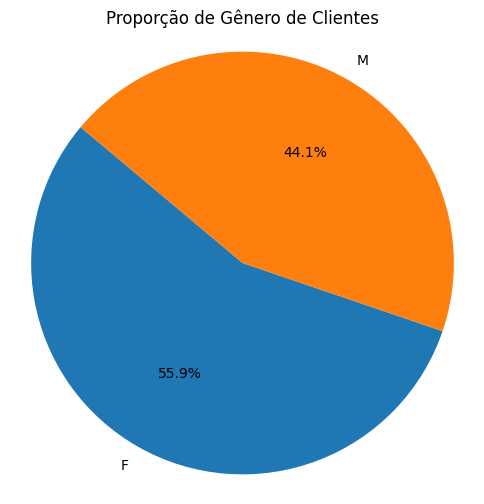

In [17]:
gender_counts = df['Gender'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Proporção de Gênero de Clientes')
plt.show()

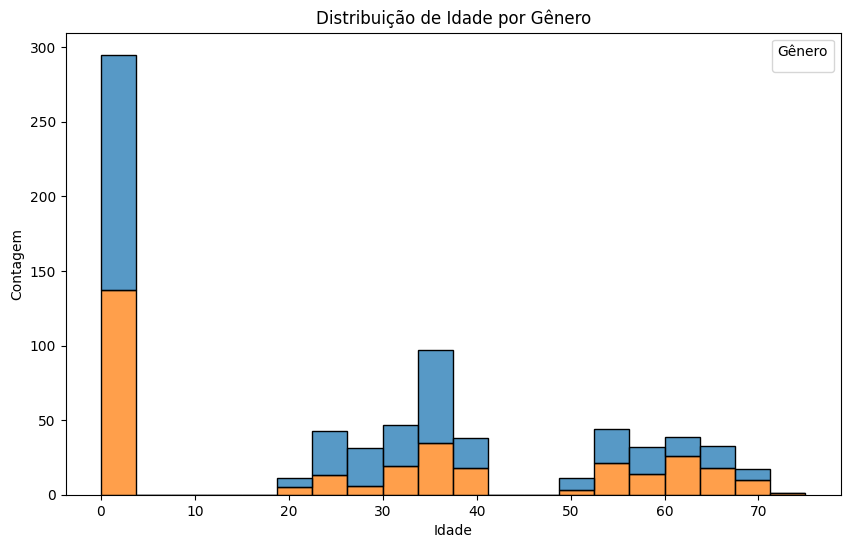

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(df, x='Age', hue='Gender', multiple='stack', bins=20)
plt.xlabel('Idade')
plt.ylabel('Contagem')
plt.title('Distribuição de Idade por Gênero')
plt.legend(title='Gênero')
plt.show()

#### c. Country

In [19]:
country_counts = df['Country'].value_counts().reset_index()
#country_counts = df['Country'].value_counts(dropna=False) # alternative
country_counts2 = df.astype(str)['Country'].value_counts()
country_counts.columns = ['Country', 'Count']
print(country_counts)

         Country  Count
0             UK    270
1            USA    173
2  OuterMongolia      1


## 3. Check:

In [20]:
df.columns

Index(['Username', 'TitleCli', 'Name', 'Address', 'Country', 'Gender', 'Age',
       'Favourites', 'Order_ID', 'Product_ID', 'Style', 'Film_Title', 'Price',
       'PurchTime', 'PurchDate', 'Buy_for'],
      dtype='object')

In [21]:
# d. Number of films sold by Style
n_sold_films = df['Style'].value_counts()
n_sold_films.columns = ['Style', 'Number of Films Sold']
print(n_sold_films)



Comedy       214
Children     151
Drama         94
Sci-Fi        92
Western       63
Horror        50
Adventure     47
Musical       28
Name: Style, dtype: int64


In [22]:
# e. Number of different Film_Title sold by Style
films_by_style = df.groupby('Style')['Film_Title'].nunique().reset_index()
films_by_style.columns = ['Style', 'Different Film Titles Sold']

print(films_by_style)

       Style  Different Film Titles Sold
0  Adventure                           5
1  Children                            3
2     Comedy                          18
3      Drama                           3
4     Horror                           4
5    Musical                           5
6     Sci-Fi                          11
7    Western                          12


In [23]:
# f. Number of units sold for each Film_title / Style
units_sold_by_title_style = df.groupby(['Style', 'Film_Title'])['Style'].count().reset_index(name='Number of Units Sold')
units_sold_by_title_style.columns = ['Style', 'Film_Title', 'Number of Units Sold']
print(units_sold_by_title_style)

        Style                                         Film_Title  \
0   Adventure                                         Hard Rider   
1   Adventure                                     LighteningBall   
2   Adventure                                     The Fourth Man   
3   Adventure                                        The IP File   
4   Adventure                                     The Nine Rules   
..        ...                                                ...   
56    Western                                        The Finders   
57    Western  The Nice the not so nice and the visually chal...   
58    Western                                    The average six   
59    Western                                         TheatreBus   
60    Western                                          True Salt   

    Number of Units Sold  
0                      9  
1                      7  
2                     10  
3                     11  
4                     10  
..                   

In [24]:
# Number of Customers who bought 1,2,3,4 DVDs

# Count the number of times each customer appears in the DataFrame
customer_counts = df['Username'].value_counts().reset_index(name='Number of') # return username and number of bought
#customer_counts.columns = ['Username', 'Number of']
counts = customer_counts['Number of'].value_counts().sort_index() # do the same but return the number of cliente bought each number.
print(customer_counts)
print(counts)

            index  Number of
0    user_3646485          4
1     user_346403          4
2    user_3066049          3
3    user_2110889          3
4    user_3945846          3
..            ...        ...
630   user_253560          1
631  user_2536223          1
632  user_2539819          1
633  user_2543844          1
634   user_993341          1

[635 rows x 2 columns]
1    547
2     74
3     12
4      2
Name: Number of, dtype: int64


In [25]:
# h. Create a summary table with Style/Uni_Vnd/Min_Prc/Max_Prk/Avg_Prck/DesvPad_Prd

sold_by_style = df['Style'].value_counts()
min_price = df['Price'].min()
max_price = df['Price'].max()
avg_price = df['Price'].mean().round(2)
print(df.columns)
print(sold_by_style)
print("Min price:" , min_price)
print("Max price:" , max_price)
print("Avg price:" , avg_price)

Index(['Username', 'TitleCli', 'Name', 'Address', 'Country', 'Gender', 'Age',
       'Favourites', 'Order_ID', 'Product_ID', 'Style', 'Film_Title', 'Price',
       'PurchTime', 'PurchDate', 'Buy_for'],
      dtype='object')
Comedy       214
Children     151
Drama         94
Sci-Fi        92
Western       63
Horror        50
Adventure     47
Musical       28
Name: Style, dtype: int64
Min price: 5.99
Max price: 15.99
Avg price: 8.74


In [26]:
import pandas as pd

# Suponhamos que 'df' seja o seu DataFrame original

# Agrupe os dados por 'Style' e calcule as estatísticas
summary_table = df.groupby('Style').agg({
    'Style': 'count',          # Contagem de vendas por estilo
    'Price': ['min', 'max', 'mean', 'std']  # Preço mínimo, máximo, médio e desvio padrão
})

# Renomeie as colunas do resumo
summary_table.columns = ['Uni_Vnd', 'Min_Prc', 'Max_Prk', 'Avg_Prck', 'DesvPad_Prd']

# Arredonde os valores
summary_table['Avg_Prck'] = summary_table['Avg_Prck'].round(2)
summary_table['DesvPad_Prd'] = summary_table['DesvPad_Prd'].round(2)

# Reset do índice para ter 'Style' como uma coluna em vez de um índice
summary_table.reset_index(inplace=True)

# Renomeie a coluna 'Style' para 'Estilo' (caso deseje)
summary_table.rename(columns={'Style': 'Estilo'}, inplace=True)

# Exiba a tabela de resumo
print(summary_table)


      Estilo  Uni_Vnd  Min_Prc  Max_Prk  Avg_Prck  DesvPad_Prd
0  Adventure       47     7.99    12.99     11.61         1.95
1  Children       151     5.99     5.99      5.99         0.00
2     Comedy      214     5.99    15.99     10.03         3.33
3      Drama       94     7.99     7.99      7.99         0.00
4     Horror       50     5.99     8.99      7.31         1.46
5    Musical       28     5.99     5.99      5.99         0.00
6     Sci-Fi       92     5.99    15.99     10.69         2.31
7    Western       63     5.99    12.99      9.48         2.42


In [27]:
df.columns

Index(['Username', 'TitleCli', 'Name', 'Address', 'Country', 'Gender', 'Age',
       'Favourites', 'Order_ID', 'Product_ID', 'Style', 'Film_Title', 'Price',
       'PurchTime', 'PurchDate', 'Buy_for'],
      dtype='object')

In [28]:
# Number of films sold by Style

df2 = df.groupby('Style')[['Price','Age']].agg({'Price': 'mean', 'Age': 'std'}).reset_index()
df2

,Style,Price,Age
0,Adventure,11.607021,16.308911
1,Children,5.990000,16.104252
2,Comedy,10.027383,19.969720
3,Drama,7.990000,29.318009
4,Horror,7.310000,27.192654
5,Musical,5.990000,11.342200
6,Sci-Fi,10.685652,26.935395
7,Western,9.482063,27.243746


In [41]:
# Number of different Film_Title sold by Style

df3 = df.groupby('Style')['Film_Title'].nunique().reset_index(name='Number_of_Styles')
df3

,Style,Number_of_Styles
0,Adventure,5
1,Children,3
2,Comedy,18
3,Drama,3
4,Horror,4
5,Musical,5
6,Sci-Fi,11
7,Western,12


In [45]:
# f. Number of units sold for each Film_title / Style

df4 = df.groupby(['Style', 'Film_Title']).size().reset_index()
df5 = df.groupby(['Style', 'Film_Title'])['Price'].count()
print(df4)
df5

        Style                                         Film_Title   0
0   Adventure                                         Hard Rider   9
1   Adventure                                     LighteningBall   7
2   Adventure                                     The Fourth Man  10
3   Adventure                                        The IP File  11
4   Adventure                                     The Nine Rules  10
..        ...                                                ...  ..
56    Western                                        The Finders   3
57    Western  The Nice the not so nice and the visually chal...   5
58    Western                                    The average six   4
59    Western                                         TheatreBus  17
60    Western                                          True Salt   3

[61 rows x 3 columns]


Style      Film_Title                                          
Adventure  Hard Rider                                               9
           LighteningBall                                           7
           The Fourth Man                                          10
           The IP File                                             11
           The Nine Rules                                          10
                                                                   ..
Western    The Finders                                              3
           The Nice the not so nice and the visually challenged     5
           The average six                                          4
           TheatreBus                                              17
           True Salt                                                3
Name: Price, Length: 61, dtype: int64

In [46]:
df.dtypes

Username              object
TitleCli              object
Name                  object
Address               object
Country               object
Gender                object
Age                    int64
Favourites            object
Order_ID              object
Product_ID             int64
Style                 object
Film_Title            object
Price                float64
PurchTime             object
PurchDate     datetime64[ns]
Buy_for               object
dtype: object

## 4. Derive

In [52]:
# a. Day of the Week Purchase (Sunday, ..., Saturday)

df['Day_of_Week_Purchase'] = df['PurchDate'].dt.day_name()
date_weekday = df[['PurchDate', 'Day_of_Week_Purchase']]
date_weekday

,PurchDate,Day_of_Week_Purchase
0,2001-02-25,Sunday
1,2001-02-22,Thursday
2,2001-02-21,Wednesday
3,2001-02-25,Sunday
4,2001-02-22,Thursday
...,...,...
734,2001-02-22,Thursday
735,2001-02-22,Thursday
736,2001-02-22,Thursday
737,2001-02-25,Sunday


In [61]:
# Defina os intervalos de tempo para os períodos do dia
periods = {
    (0, 11): 'Morning',     # Manhã (00:00 - 11:59)
    (12, 17): 'Afternoon',  # Tarde (12:00 - 17:59)
    (18, 23): 'Evening'     # Noite (18:00 - 23:59)
}

# Função para atribuir um período com base no horário de compra
def assign_purchase_period(time):
    for (start, end), period in periods.items():
        if start <= time <= end:
            return period
    return None

# Aplique a função para criar a coluna 'Purchase_Period'
df['PurchTime'] = pd.to_datetime(df['PurchTime']).dt.hour
df['Purchase_Period'] = df['PurchTime'].apply(assign_purchase_period)
df_time_to_period = df[['PurchTime', 'Purchase_Period']]



In [63]:
# c. Price range (low, medium, high)

# Defina os limites para as faixas de preço
price_ranges = {
    (0, 7.99): 'Low',       # Faixa de preço baixo (até 7.99)
    (8.00, 12.99): 'Medium', # Faixa de preço médio (8.00 - 12.99)
    (13.00, float('inf')): 'High'  # Faixa de preço alto (13.00 em diante)
}

# Função para atribuir uma faixa de preço com base no preço
def assign_price_range(price):
    for (start, end), range_label in price_ranges.items():
        if start <= price <= end:
            return range_label
    return None

# Aplique a função para criar a coluna 'Price_Range'
df['Price_Range'] = df['Price'].apply(assign_price_range)
df

,Username,TitleCli,Name,Address,Country,Gender,Age,Favourites,Order_ID,Product_ID,Style,Film_Title,Price,PurchTime,PurchDate,Buy_for,Day_of_Week_Purchase,Purchase_Period,Price_Range
0,user_1000884,MRS,DORIS126855,89594388-Boris Road-Doris Town,USA,F,27,Adventure,Order_ID_25002281,1048,Comedy,This was Tinny Sap,9.99,0,2001-02-25,Myself,Sunday,Morning,Medium
1,user_1009862,MRS,DORIS42531,75844730-Boris Road-Doris Town,UK,F,36,Children,Order_ID_11048478,1060,Children,The Buppets,5.99,0,2001-02-22,Family,Thursday,Morning,Low
2,user_1025298,MISS,DORIS136770,39704306-Boris Road-Doris Town,UK,F,38,Children,Order_ID_62493972,1062,Children,Bogus the Clown,5.99,0,2001-02-21,Family,Wednesday,Morning,Low
3,user_1039001,MR,BORIS111529,46627181-Boris Road-Doris Town,NaN,M,0,NaN,Order_ID_40324890,1048,Comedy,This was Tinny Sap,9.99,0,2001-02-25,NaN,Sunday,Morning,Medium
4,user_1040891,MRS,DORIS142154,82645107-Boris Road-Doris Town,USA,F,25,Adventure,Order_ID_79222013,1013,Comedy,Dr OddBloke or: What bomb? Where?,15.99,0,2001-02-22,Myself,Thursday,Morning,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
734,user_972607,MRS,DORIS6273,36217755-Boris Road-Doris Town,NaN,F,0,NaN,Order_ID_23136195,1031,Musical,Cryin in the Rain,5.99,0,2001-02-22,NaN,Thursday,Morning,Low
735,user_975665,MR,BORIS95778,43605144-Boris Road-Doris Town,USA,M,23,Adventure,Order_ID_26082375,1043,Comedy,Fetche la Vache,15.99,0,2001-02-22,Myself,Thursday,Morning,High
736,user_979177,MRS,DORIS74765,94620905-Boris Road-Doris Town,UK,F,35,Children,Order_ID_75110109,1060,Children,The Buppets,5.99,0,2001-02-22,Family,Thursday,Morning,Low
737,user_99281,MR,BORIS13620,57719599-Boris Road-Doris Town,NaN,M,0,NaN,Order_ID_34100400,1022,Sci-Fi,The Tempest,7.99,0,2001-02-25,NaN,Sunday,Morning,Low


In [66]:
conditions = [
(df['Age'] < 20),
(df['Age'] >= 20) & (df['Age'] < 40),
(df['Age'] >= 40) & (df['Age'] < 60),
(df['Age'] >= 60)
]
values = ['<20 years old', '20-39 years old', '40-59 years old', '60+ years old']
df['Age Group'] = np.select(conditions, values)
df

,Username,TitleCli,Name,Address,Country,Gender,Age,Favourites,Order_ID,Product_ID,Style,Film_Title,Price,PurchTime,PurchDate,Buy_for,Day_of_Week_Purchase,Purchase_Period,Price_Range,Age Group
0,user_1000884,MRS,DORIS126855,89594388-Boris Road-Doris Town,USA,F,27,Adventure,Order_ID_25002281,1048,Comedy,This was Tinny Sap,9.99,0,2001-02-25,Myself,Sunday,Morning,Medium,20-39 years old
1,user_1009862,MRS,DORIS42531,75844730-Boris Road-Doris Town,UK,F,36,Children,Order_ID_11048478,1060,Children,The Buppets,5.99,0,2001-02-22,Family,Thursday,Morning,Low,20-39 years old
2,user_1025298,MISS,DORIS136770,39704306-Boris Road-Doris Town,UK,F,38,Children,Order_ID_62493972,1062,Children,Bogus the Clown,5.99,0,2001-02-21,Family,Wednesday,Morning,Low,20-39 years old
3,user_1039001,MR,BORIS111529,46627181-Boris Road-Doris Town,NaN,M,0,NaN,Order_ID_40324890,1048,Comedy,This was Tinny Sap,9.99,0,2001-02-25,NaN,Sunday,Morning,Medium,<20 years old
4,user_1040891,MRS,DORIS142154,82645107-Boris Road-Doris Town,USA,F,25,Adventure,Order_ID_79222013,1013,Comedy,Dr OddBloke or: What bomb? Where?,15.99,0,2001-02-22,Myself,Thursday,Morning,High,20-39 years old
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
734,user_972607,MRS,DORIS6273,36217755-Boris Road-Doris Town,NaN,F,0,NaN,Order_ID_23136195,1031,Musical,Cryin in the Rain,5.99,0,2001-02-22,NaN,Thursday,Morning,Low,<20 years old
735,user_975665,MR,BORIS95778,43605144-Boris Road-Doris Town,USA,M,23,Adventure,Order_ID_26082375,1043,Comedy,Fetche la Vache,15.99,0,2001-02-22,Myself,Thursday,Morning,High,20-39 years old
736,user_979177,MRS,DORIS74765,94620905-Boris Road-Doris Town,UK,F,35,Children,Order_ID_75110109,1060,Children,The Buppets,5.99,0,2001-02-22,Family,Thursday,Morning,Low,20-39 years old
737,user_99281,MR,BORIS13620,57719599-Boris Road-Doris Town,NaN,M,0,NaN,Order_ID_34100400,1022,Sci-Fi,The Tempest,7.99,0,2001-02-25,NaN,Sunday,Morning,Low,<20 years old


In [74]:
registered_customers_df = df[df['Username'] == True]  # Substitua 'IsRegistered' pela coluna relevante em seu DataFrame
has_null = df['Username'].isnull().any()
has_null

False